#  Testing Models: SVM Classifiers #

In general, classifiers have tended to perform better on this data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# read in data set with categorical variables turned into dummy variablees
df = pd.read_csv('data/cleaned_data/md_dum.csv')

# create X and y values for modeling, this time using a mask to create 1 and 0 values for classification
car_c_y = df.car_acc_score.mask(df.car_acc_score > 0, 1)
car_X = df.drop(columns=['Unnamed: 0', 'car_acc_score', 'car_dens_score', 'bike_dens_score'])
bike_c_y = df.bike_acc_score.mask(df.bike_acc_score > 0, 1)
bike_X = df.drop(columns=['Unnamed: 0', 'bike_acc_score', 'car_dens_score', 'bike_dens_score'])

In [3]:
# train test split
X_car_c_train, X_car_c_test, y_car_c_train, y_car_c_test = train_test_split(car_X, car_c_y, test_size=0.3, 
                                                                            random_state=18,
                                                                            shuffle=True, stratify=car_c_y)
X_bike_c_train, X_bike_c_test, y_bike_c_train, y_bike_c_test = train_test_split(bike_X, bike_c_y, test_size=0.3, 
                                                                            random_state=18,
                                                                            shuffle=True, stratify=bike_c_y)

### SVC ###

In [4]:
svc = SVC()
svc.fit(X_car_c_train, y_car_c_train)
score = svc.score(X_car_c_test, y_car_c_test)
print('SVC Score on car accidents is: {}'.format(score))

SVC Score on car accidents is: 0.8345100508162072


[[10395  2088]
 [ 1592  8162]]


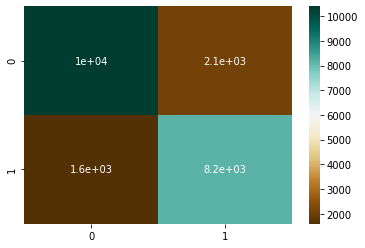

In [5]:
pred = svc.predict(X_car_c_test)
c=confusion_matrix(y_car_c_test, pred)
sns.heatmap(c,cmap='BrBG',annot=True)
print(c)
plt.show()

In [6]:
print(classification_report(y_car_c_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85     12483
           1       0.80      0.84      0.82      9754

    accuracy                           0.83     22237
   macro avg       0.83      0.83      0.83     22237
weighted avg       0.84      0.83      0.83     22237



In [7]:
lsvc = LinearSVC()
lsvc.fit(X_car_c_train, y_car_c_train)
score = lsvc.score(X_car_c_test, y_car_c_test)
print('Linear SVC Score on car accidents is: {}'.format(score))

Linear SVC Score on car accidents is: 0.6808472365876692


C:\Users\linne\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[[5428 7055]
 [  42 9712]]


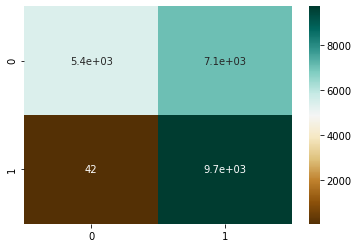

In [8]:
pred = lsvc.predict(X_car_c_test)
c=confusion_matrix(y_car_c_test, pred)
sns.heatmap(c,cmap='BrBG',annot=True)
print(c)
plt.show()

In [9]:
print(classification_report(y_car_c_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.43      0.60     12483
           1       0.58      1.00      0.73      9754

    accuracy                           0.68     22237
   macro avg       0.79      0.72      0.67     22237
weighted avg       0.81      0.68      0.66     22237



In [10]:
sgdc = SGDClassifier(loss='log', penalty='l1')
sgdc.fit(X_car_c_train, y_car_c_train)
score = sgdc.score(X_car_c_test, y_car_c_test)
print('SGDClassifier Score on car accidents is: {}'.format(score))

SGDClassifier Score on car accidents is: 0.7190268471466474


[[6639 5844]
 [ 404 9350]]


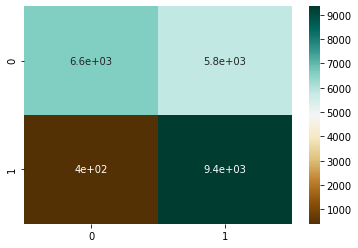

In [11]:
pred = sgdc.predict(X_car_c_test)
c=confusion_matrix(y_car_c_test, pred)
sns.heatmap(c,cmap='BrBG',annot=True)
print(c)
plt.show()

In [12]:
print(classification_report(y_car_c_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.53      0.68     12483
           1       0.62      0.96      0.75      9754

    accuracy                           0.72     22237
   macro avg       0.78      0.75      0.71     22237
weighted avg       0.80      0.72      0.71     22237



It looks like the SVC classifier is the best of these. Let's see how it performs on the bike accident data. 

In [13]:
svc.fit(X_bike_c_train, y_bike_c_train)
score = svc.score(X_bike_c_test, y_bike_c_test)
print('SVC Score on bike accidents is: {}'.format(score))

SVC Score on bike accidents is: 0.7882358231775869


[[17525     1]
 [ 4708     3]]


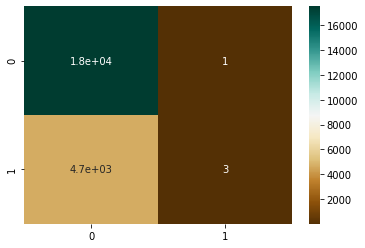

In [14]:
pred = svc.predict(X_bike_c_test)
c=confusion_matrix(y_bike_c_test, pred)
sns.heatmap(c,cmap='BrBG',annot=True)
print(c)
plt.show()

In [15]:
print(classification_report(y_bike_c_test, pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88     17526
           1       0.75      0.00      0.00      4711

    accuracy                           0.79     22237
   macro avg       0.77      0.50      0.44     22237
weighted avg       0.78      0.79      0.70     22237



That's pretty unbalanced for bike accidents. Lots of true negatives but no true positives. I'll try the other classifiers on bike accidents.

In [16]:
lsvc.fit(X_bike_c_train, y_bike_c_train)
score = lsvc.score(X_bike_c_test, y_bike_c_test)
print('Linear SVC Score on car accidents is: {}'.format(score))

Linear SVC Score on car accidents is: 0.7938570850384494


C:\Users\linne\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[[17088   438]
 [ 4146   565]]


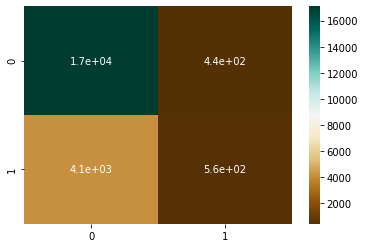

In [17]:
pred = lsvc.predict(X_bike_c_test)
c=confusion_matrix(y_bike_c_test, pred)
sns.heatmap(c,cmap='BrBG',annot=True)
print(c)
plt.show()

In [18]:
print(classification_report(y_bike_c_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88     17526
           1       0.56      0.12      0.20      4711

    accuracy                           0.79     22237
   macro avg       0.68      0.55      0.54     22237
weighted avg       0.75      0.79      0.74     22237



In [19]:
sgdc.fit(X_bike_c_train, y_bike_c_train)
score = sgdc.score(X_bike_c_test, y_bike_c_test)
print('SGDClassifier Score on car accidents is: {}'.format(score))

SGDClassifier Score on car accidents is: 0.7617484372892027


[[16495  1031]
 [ 4267   444]]


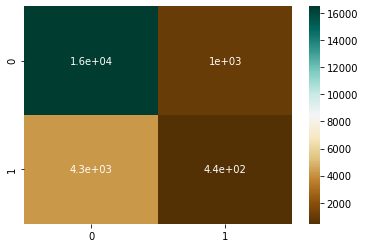

In [20]:
pred = sgdc.predict(X_bike_c_test)
c=confusion_matrix(y_bike_c_test, pred)
sns.heatmap(c,cmap='BrBG',annot=True)
print(c)
plt.show()

In [21]:
print(classification_report(y_bike_c_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86     17526
           1       0.30      0.09      0.14      4711

    accuracy                           0.76     22237
   macro avg       0.55      0.52      0.50     22237
weighted avg       0.69      0.76      0.71     22237



Looks like it's going to be harder to  find a classifier for bike accidents than car accidents.

On to Tree Regressors [Go>>](Testing%20Models%20-%20Tree%20and%20Ensemble%20Regressors.ipynb)